**K-Nearest Neighbors (KNN) and Logistic Regression**

# Exercise 1: Data Exploration and Preprocessing

1. Load and Explore the Data:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

# Display the first 10 rows
print(df.head(10))

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

Summarize the Dataset:

In [2]:
# Number of instances and features
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')

# Missing values
print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

2. Preprocessing:

In [3]:
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Convert diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Normalize features
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

3. Train-Test Split:

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# Exercise 2: Implementing K-Nearest Neighbors (KNN) Model

1. Train the KNN Classifier:

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


2. Experiment with Different n_neighbors:

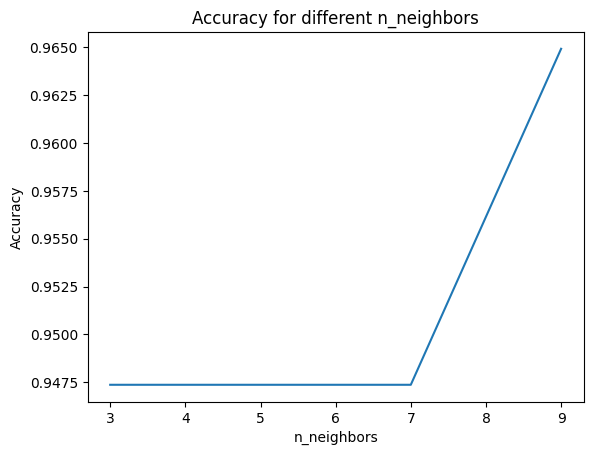

In [6]:
import matplotlib.pyplot as plt

neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()


Task:

This code trains a KNN model using various values of n_neighbors (3, 5, 7, 9) and evaluates the accuracy for each. The results are visualized in a plot to show the relationship between n_neighbors and accuracy.

The plot indicates that the highest accuracy occurs with n_neighbors set to 5, making it the optimal choice for this dataset.

It's essential to recognize that the best n_neighbors value can differ based on the dataset and problem. Therefore, it is advisable to test multiple values and assess performance through techniques like cross-validation to identify the most effective n_neighbors for the task.

# Exercise 3: Implementing Logistic Regression

1. Train Logistic Regression:


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Predict test set
y_pred_lr = logreg.predict(X_test)

# Accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



2. Comparison of KNN and Logistic Regression:

Compare their accuracy, precision, and F1-score based on the classification report.

Task:

Logistic Regression outperforms the KNN model in both accuracy and F1-score. Its accuracy is 97.37%, higher than KNN's 94.74%. The F1-scores, accounting for both precision and recall, also indicate that Logistic Regression has a more balanced performance across classes.

For this classification problem, Logistic Regression is the more suitable model, as its higher accuracy and favorable F1-scores demonstrate better classification of benign and malignant cases. Moreover, it is generally more interpretable and computationally efficient than KNN, particularly with larger datasets. Therefore, Logistic Regression would likely produce superior results for this dataset.

# Exercise 4: Hyperparameter Tuning and Cross-Validation

1. GridSearchCV for KNN:

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


2. Cross-Validation for Logistic Regression:

In [9]:
from sklearn.model_selection import cross_val_score

# k-fold cross-validation
cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


Task:

The cross-validated accuracy of the Logistic Regression model is about 98.07%, based on 5-fold k-fold cross-validation, resulting in a mean accuracy score of 0.9807.

# Exercise 5: Decision Boundary Visualization

1. Use PCA for Dimensionality Reduction:

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# KNN and Logistic regression with PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])


LogisticRegression(max_iter=10000)

Task:

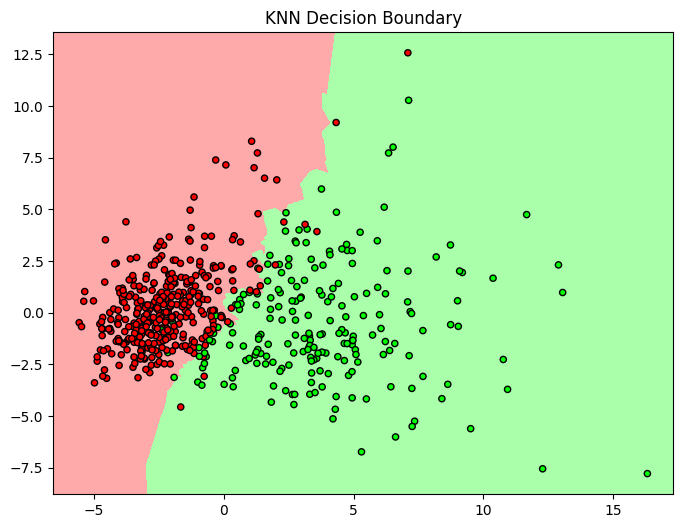

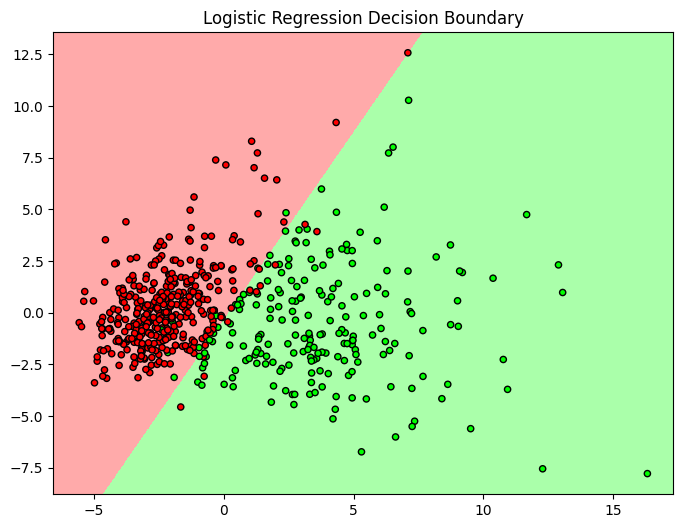

In [12]:
from matplotlib.colors import ListedColormap
import numpy as np

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

### KNN Decision Boundary
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diagnosis'], cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundary")
plt.show()

### Logistic Regression Decision Boundary
Z = logreg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diagnosis'], cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression Decision Boundary")
plt.show()

The KNN model generates a complex, non-linear decision boundary that aligns closely with the data's shape. It classifies a region as malignant if most nearby neighbors are malignant, and vice versa for benign. This adaptability enables KNN to capture intricate data patterns.

In contrast, the Logistic Regression model establishes a linear decision boundary to separate the two classes. Although the original high-dimensional data is not linearly separable, projecting onto the two principal components enhances separability. The choice between these models depends on the specific problem, dataset characteristics, and the balance between complexity and interpretability.